In [1]:
import sys
import warnings

import torch

sys.path.append('../')
from datasets.dist import GMM, Gaussian
from model.flow import FlowWrapper
from utils.parsing import parse_args
from datasets.verlet import VerletData

# Suppress specific UserWarnings globally
warnings.filterwarnings("ignore", category=UserWarning)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
args = parse_args([])

In [2]:
# Initialize default Verlet Flow
flow_wrapper = FlowWrapper.default_flow_wrapper(args, device)
flow_wrapper.load_from_file('../workdir/best_trimodal/best_model.pt')
flow_wrapper.eval()

FlowWrapper(
  (_flow): VerletFlow(
    (_q_vp_net): Sequential(
      (0): Linear(in_features=3, out_features=4, bias=True)
      (1): SELU()
      (2): Linear(in_features=4, out_features=4, bias=True)
      (3): SELU()
      (4): Linear(in_features=4, out_features=4, bias=True)
      (5): SELU()
      (6): Linear(in_features=4, out_features=2, bias=True)
    )
    (_q_nvp_net): Sequential(
      (0): Linear(in_features=3, out_features=10, bias=True)
      (1): SELU()
      (2): Linear(in_features=10, out_features=10, bias=True)
      (3): SELU()
      (4): Linear(in_features=10, out_features=10, bias=True)
      (5): SELU()
      (6): Linear(in_features=10, out_features=4, bias=True)
    )
    (_p_vp_net): Sequential(
      (0): Linear(in_features=3, out_features=4, bias=True)
      (1): SELU()
      (2): Linear(in_features=4, out_features=4, bias=True)
      (3): SELU()
      (4): Linear(in_features=4, out_features=4, bias=True)
      (5): SELU()
      (6): Linear(in_features=4, out

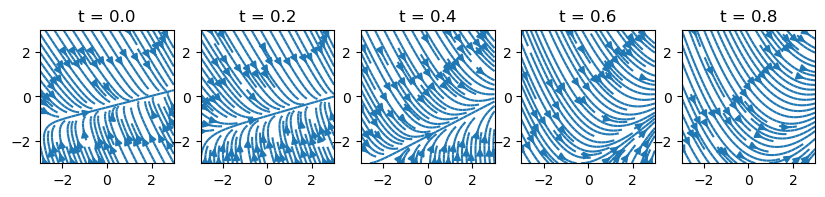

In [3]:
flow_wrapper.graph_flow_marginals()

In [4]:
print(f'Reverse KL loss: {flow_wrapper.reverse_kl_loss(100000, 10)}')
samples, _ = flow_wrapper.sample(10,10)
print(f'Target density of samples: {flow_wrapper._target.q_density.get_density(samples.q)}')

Reverse KL loss: 0.03246203437447548
Target density of samples: tensor([-3.5855, -2.1048, -2.3083, -2.0278, -1.6928, -1.8504, -2.6448, -2.8812,
        -1.6857, -2.2460], device='cuda:0', grad_fn=<LogsumexpBackward0>)


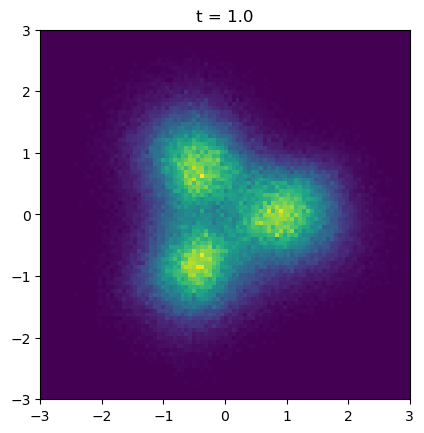

In [7]:
flow_wrapper.graph_end_marginals(300000, 15, xlim=3.0, ylim=3.0)

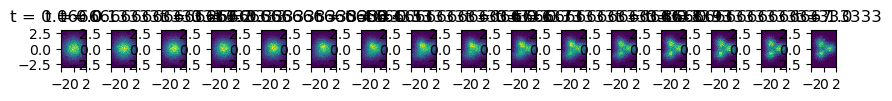

In [5]:
flow_wrapper.graph_time_marginals(100000, 15, ylim=3.0, xlim = 2.0)
